# Project 2: Exploratory Data Analysis

Analyzing data on properties for sale

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing pandas for data analysis and matplotlib for some plotting features

## Part 1) Upload and read the dataset

In [2]:
df = pd.read_csv('real_estate_data_us.csv', sep='\\t')

/Users/Ty/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [4]:
df.shape

(23699, 22)

#### All distance in Meters, Area in Sq Meters, Price in Dollars

## Part 2) Preprocess the Data

Find, fill, or leave missing values
Convert data types

In [5]:
df.isna().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

#### What to do With NaNs:
- Convert the following to 0 because the NaNs likely mean that there are none
    - balconies, parks_within_3000, ponds_within_3000
- Convert the following to 4000 because the distance measured is within 3000 in other columns so I increase the value to 4000 so that I know listing with that value are more the 3000 meters from a pond or park
    - park_dist, pond_dist
- Convert the following to the median value of the column. After looking at the histogram for each, they are either relatively normal or they are skewed to the right so the median would be the best measurement to fill in
    - days_listed, ceiling_height, airport_dist, city_center_dist
- Converting each of these to a calculation that is equal to 1/4 the size of the total area. Many of the NaNs here are likely because the listed apartment is a studio so everything is in one room and the lines for each are (kitchen, living, bed, bathroom) are unclear. So here I fill in this value for those missing to give a general idea of the space. If I calculate using column average or median, it is possible that a one of these spaces would be calculated as larger than the total_area of the apartment which does not make sense.
    - kitchen_area, living_area
- Converting NaNs to equal the floor that the apartment is listed to be on, since I don't want to asume another number and have floors_total < floor which would be illogical. 
    - floors_total
- bike_parking: convert NaNs to False because it is a boolean and I will assume that if there is no value then there is no bike parking
- locality_name: Drop since there are only 49 NaNs and it will have a minimal effect on the data

In [6]:
df[['balconies', 'parks_within_3000', 'ponds_within_3000']] = df[['balconies', 'parks_within_3000', 'ponds_within_3000']].fillna(0)
df[['park_dist', 'pond_dist']] = df[['park_dist', 'pond_dist']].fillna(4000)
df[['days_listed', 'ceiling_height', 'airport_dist', 'city_center_dist']] = df[['days_listed', 'ceiling_height', 'airport_dist', 'city_center_dist']].fillna(df.median())
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']/4)
df['living_area'] = df['living_area'].fillna(df['total_area']/4)
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['bike_parking'] = df['bike_parking'].fillna(False)
df.dropna(subset=['locality_name'], inplace=True)
df.isna().sum()

date_posted          0
days_listed          0
last_price           0
bedrooms             0
kitchen_area         0
living_area          0
total_area           0
balconies            0
ceiling_height       0
floors_total         0
floor                0
total_images         0
bike_parking         0
is_studio            0
is_open_plan         0
locality_name        0
airport_dist         0
city_center_dist     0
park_dist            0
parks_within_3000    0
pond_dist            0
ponds_within_3000    0
dtype: int64

In [7]:
df.shape

(23650, 22)

#### Check and convert Data Types

In [8]:
df.dtypes

date_posted           object
days_listed          float64
last_price           float64
bedrooms               int64
kitchen_area         float64
living_area          float64
total_area           float64
balconies            float64
ceiling_height       float64
floors_total         float64
floor                  int64
total_images           int64
bike_parking            bool
is_studio               bool
is_open_plan            bool
locality_name         object
airport_dist         float64
city_center_dist     float64
park_dist            float64
parks_within_3000    float64
pond_dist            float64
ponds_within_3000    float64
dtype: object

#### Data types to convert
- Convert date to standard time and format
- All floats can be converted to ints except for kitchen_area, living_area, total_area, and ceiling_height
    - Since those should all be integers we can ignore the decimal by converting them
- bike_parking current type is object, but values are T/F, Convert to bool

In [9]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
to_be_int = {'days_listed':int, 'last_price':int, 'balconies':int, 'floors_total':int, 'airport_dist':int, 'city_center_dist':int, 'park_dist':int, 'parks_within_3000':int, 'pond_dist':int, 'ponds_within_3000':int}
df = df.astype(to_be_int)
df['bike_parking'] = df['bike_parking'].astype(bool)
df.dtypes

date_posted          datetime64[ns]
days_listed                   int64
last_price                    int64
bedrooms                      int64
kitchen_area                float64
living_area                 float64
total_area                  float64
balconies                     int64
ceiling_height              float64
floors_total                  int64
floor                         int64
total_images                  int64
bike_parking                   bool
is_studio                      bool
is_open_plan                   bool
locality_name                object
airport_dist                  int64
city_center_dist              int64
park_dist                     int64
parks_within_3000             int64
pond_dist                     int64
ponds_within_3000             int64
dtype: object

In [11]:
df.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,95,260000,3,25.00,51.00,108.0,0,2.70,16,...,False,False,False,Saint Petersburg,18863,16028,482,1,755,2
1,2018-12-04,81,67000,1,11.00,18.60,40.4,2,2.65,11,...,False,False,False,Shushary village,12817,18603,4000,0,4000,0
2,2015-08-20,558,103920,2,8.30,34.30,56.0,0,2.65,5,...,False,False,False,Saint Petersburg,21741,13933,90,1,574,2
3,2015-07-24,424,1298000,3,39.75,39.75,159.0,0,2.65,14,...,False,False,False,Saint Petersburg,28098,6800,84,2,234,3
4,2018-06-19,121,200000,2,41.00,32.00,100.0,0,3.03,14,...,False,False,False,Saint Petersburg,31856,8098,112,2,48,1


## Part 3) Make Calculations and Add Columns
- Price per sq meter
- Day of week, month, and year the ad was published
- Which floor the apartment is on
- Ratio between living space and total area
- Ratio between kitchen space and total area

In [12]:
df['ppsm'] = (df['last_price'] / df['total_area']).astype(int)

df[['last_price', 'total_area', 'ppsm']].head()

,last_price,total_area,ppsm
0,260000,108.0,2407
1,67000,40.4,1658
2,103920,56.0,1855
3,1298000,159.0,8163
4,200000,100.0,2000


In [13]:
df['weekday_posted'] = df['date_posted'].dt.weekday
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

df[['date_posted', 'weekday_posted', 'month_posted', 'year_posted']].head()

,date_posted,weekday_posted,month_posted,year_posted
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


In [14]:
def floor_group(d):
    '''
    this takes the floor number and groups them either on the first floor, top floor, or other
    '''
    if d[10] == 1:
        return 'first_floor'
    if d[10] == d[9]:
        return 'top_floor'
    return 'other'

df['floor_group'] = df.apply(floor_group, axis=1)

df[['floor', 'floors_total', 'floor_group']].head()

,floor,floors_total,floor_group
0,8,16,other
1,1,11,first_floor
2,4,5,other
3,9,14,other
4,13,14,other


In [15]:
df['living_ratio'] = round((df['living_area'] / df['total_area']),2)
df['kitchen_ratio'] = round((df['kitchen_area'] / df['total_area']),2)

df[['living_area', 'kitchen_area', 'total_area', 'living_ratio', 'kitchen_ratio']].head()

,living_area,kitchen_area,total_area,living_ratio,kitchen_ratio
0,51.00,25.00,108.0,0.47,0.23
1,18.60,11.00,40.4,0.46,0.27
2,34.30,8.30,56.0,0.61,0.15
3,39.75,39.75,159.0,0.25,0.25
4,32.00,41.00,100.0,0.32,0.41


In [16]:
new_cols = df.iloc[:,22:].copy()
new_cols.head()

,ppsm,weekday_posted,month_posted,year_posted,floor_group,living_ratio,kitchen_ratio
0,2407,3,3,2019,other,0.47,0.23
1,1658,1,12,2018,first_floor,0.46,0.27
2,1855,3,8,2015,other,0.61,0.15
3,8163,4,7,2015,other,0.25,0.25
4,2000,1,6,2018,other,0.32,0.41


## Part 4) Exploratory Analysis
- Histograms, Correlations, Scatteplots, Mean/Median, Outliers, etc.

#### Histograms: 
- square area
    - Filtered outliers above 200
- price
    - Filtered outliers above 300000
- number of rooms
    - Filtered outliers above 15
- ceiling height
    - 

Min: 12.0
Max: 900.0


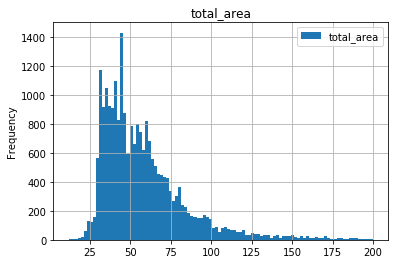

In [17]:
print('Min:', df['total_area'].min())
print('Max:', df['total_area'].max())
area_filt = df[df['total_area'] <= 200]
area_filt.plot(y='total_area', kind='hist', title='total_area', bins=100, grid=True)

Min: 244
Max: 15260000


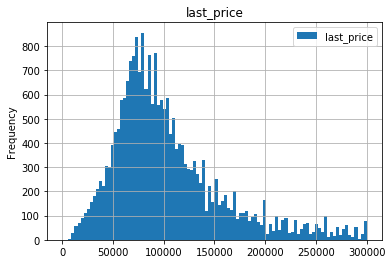

In [18]:
print('Min:', df['last_price'].min())
print('Max:', df['last_price'].max())
price_filt = df[df['last_price'] <= 300000]
price_filt.plot(y='last_price', kind='hist', title='last_price', range=(0,300000), bins=100, grid=True)

Min: 0
Max: 19


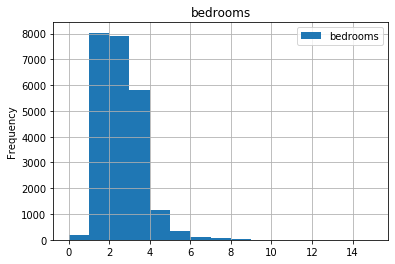

In [19]:
print('Min:', df['bedrooms'].min())
print('Max:', df['bedrooms'].max())
room_filt = df[df['bedrooms'] <= 15]
room_filt.plot(y='bedrooms', kind='hist', title='bedrooms', range=(0,15), bins=15, grid=True)

Min: 1.0
Max: 100.0


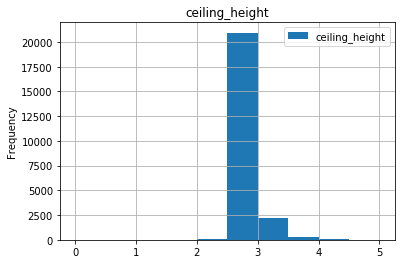

In [20]:
print('Min:', df['ceiling_height'].min())
print('Max:', df['ceiling_height'].max())
ch_filt = df[df['ceiling_height'] <= 5]
ch_filt.plot(y='ceiling_height', kind='hist', title='ceiling_height', range=(0,5), bins=10, grid=True)

#### Time to sell an apartment:
- Mean and Median times

Mean value: 169.22274841437633
Median value: 95.0

Description:
count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_listed, dtype: float64


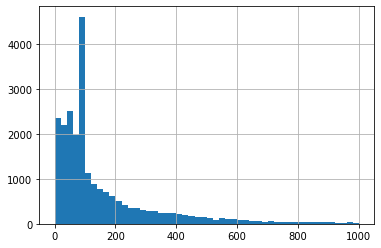

In [21]:
print('Mean value:', df['days_listed'].mean())
print('Median value:', df['days_listed'].median())
print()
print('Description:')
print(df['days_listed'].describe())

df['days_listed'].hist(bins=50, range=(0,1000))

#### What makes a sale extra quick or extra long?
- Based on the histogram, there is not a clean Poisson distribution due to the spike in days listed around 200.
- Looking at some of the descriptive statistics I would say that a sales would be considered extra quick if it is listed for 30 days or less (about 2/3 of the first quartile), and a sale is considered extra long if it takes more than 250 days.

#### Outlier Removal

Top Whisker: 427.5


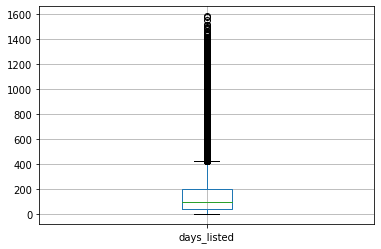

In [22]:
cols = list(df.columns)
dl = pd.DataFrame(df['days_listed'])
dl.boxplot()
print('Top Whisker:', (1.5*(198-45))+198) # 1.5 time the IQR added to the 3rd Quartile

In [23]:
og_count = df['days_listed'].count()
count_over_428 = df[df['days_listed']>=428]['days_listed'].count()
print(og_count)
print(count_over_428)
print('Percent Outliers: {:.2f}%'.format((count_over_428 / og_count)*100))

23650
2345
Percent Outliers: 9.92%


In [24]:
df2 = df[df['days_listed']<428]
df2['days_listed'].count()

21305

#### What Factors impact Price using Scatterplots and Correlation:
- Total Sq Area
- number ofrooms
- floor
- proximity to city center
- date (month, day, year)


In [25]:
df2.columns

Index(['date_posted', 'days_listed', 'last_price', 'bedrooms', 'kitchen_area',
       'living_area', 'total_area', 'balconies', 'ceiling_height',
       'floors_total', 'floor', 'total_images', 'bike_parking', 'is_studio',
       'is_open_plan', 'locality_name', 'airport_dist', 'city_center_dist',
       'park_dist', 'parks_within_3000', 'pond_dist', 'ponds_within_3000',
       'ppsm', 'weekday_posted', 'month_posted', 'year_posted', 'floor_group',
       'living_ratio', 'kitchen_ratio'],
      dtype='object')

Correlation: 64.16%


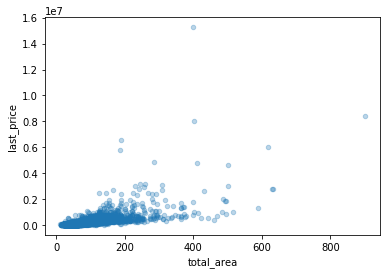

In [26]:
df2.plot(x='total_area', y='last_price', kind='scatter', alpha=.3)
print('Correlation: {:.2f}%'.format(df2['last_price'].corr(df2['total_area'])*100))

Correlation: 35.28%


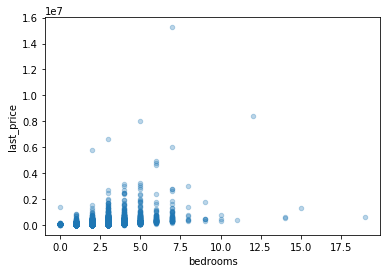

In [27]:
df2.plot(x='bedrooms', y='last_price', kind='scatter', alpha=.3)
print('Correlation: {:.2f}%'.format(df2['last_price'].corr(df2['bedrooms'])*100))

Correlation: 3.09%


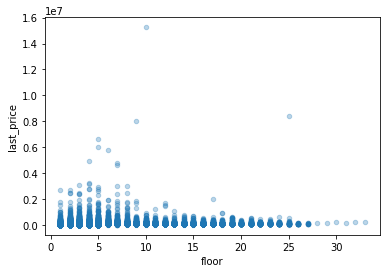

In [28]:
df2.plot(x='floor', y='last_price', kind='scatter', alpha=.3)
print('Correlation: {:.2f}%'.format(df2['last_price'].corr(df2['floor'])*100))

Correlation: -18.12%


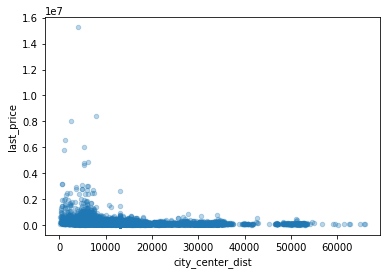

In [29]:
df2.plot(x='city_center_dist', y='last_price', kind='scatter', alpha=.3)
print('Correlation: {:.2f}%'.format(df2['last_price'].corr(df2['city_center_dist'])*100))

Correlation by weekday: 0.03%
Correlation by month: -0.03%
Correlation by year: -2.01%


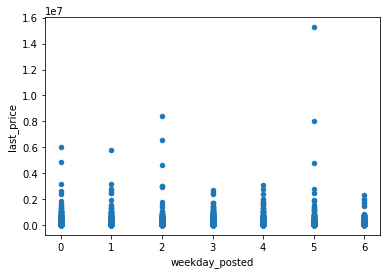

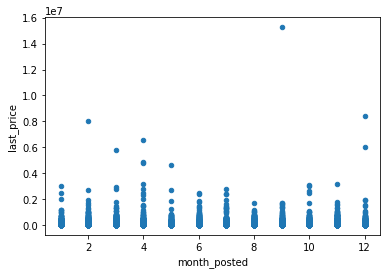

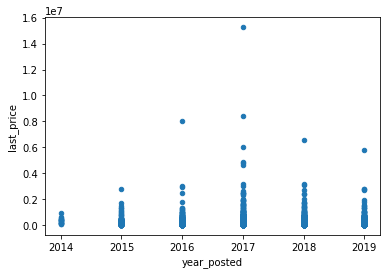

In [30]:
df2.plot(x='weekday_posted', y='last_price', kind='scatter')
df2.plot(x='month_posted', y='last_price', kind='scatter')
df2.plot(x='year_posted', y='last_price', kind='scatter')

print('Correlation by weekday: {:.2f}%'.format(df2['last_price'].corr(df2['weekday_posted'])*100))
print('Correlation by month: {:.2f}%'.format(df2['last_price'].corr(df2['month_posted'])*100))
print('Correlation by year: {:.2f}%'.format(df2['last_price'].corr(df2['year_posted'])*100))

### Correlation Takeaways:
- Total Sq Area
    - 64.16% correlation
    - Highest positive impact on price which seems to make sense since one would pay more for more space
    
- Number of rooms
    - 35.28% correlation
    - Second highest correlation, but not to strong, related to total area since more rooms means more space
    
- Floor
    - 3.09% correlation
    - very low impact here
    
- Proximity to city center
    - -19.21% correlation
    - The strongest negative correlation, but still only around -20%, due to the fact that closer to the center is more desirable so a smaller number (lower distance) will cost more for convenience to the center
    
- Weekday
    - 0.03% correlation
    - No significant impact
- Month
    - -0.03% correlation
    - No significant impact, but based on scatter plot, there a minor peaks in April and October
        
- Year
    - -2.01% correlation
    - very low impact, but based on scatter plot prices were skewed slightly higher in 2017

#### Top 10 Localities with the most Listings:
- Average price per Sq Meter in each loacality
- Which have the highest prices and which have the lowest

In [31]:
top_10_local = df2['locality_name'].value_counts()[:10].index.tolist()
df2['locality_name'].value_counts()[:10]

Saint Petersburg     14105
Murino village         511
Shushary village       407
Vsevolozhsk            356
Pushkin                334
Kolpino                316
Pargolovo village      301
Gatchina               273
Kudrovo village        263
Vyborg                 214
Name: locality_name, dtype: int64

In [32]:
top_local = df2.query('locality_name in @top_10_local')
top_local.pivot_table(index='locality_name', values='ppsm', aggfunc='mean').sort_values(by='ppsm')

,ppsm
locality_name,
Vyborg,1164.579439
Vsevolozhsk,1378.705056
Gatchina,1379.560440
Kolpino,1507.183544
Shushary village,1574.800983
Murino village,1718.450098
Pargolovo village,1793.378738
Kudrovo village,1853.460076
Pushkin,2056.745509


#### Average price per square meter (ppsm) seen in pivot table above sorted from lowest average to highest
#### Vyborg has the lowest average price while Saint Petersburg has the highest

#### In St Petersburg, Determine which area is the city center
- Create column with distance to city center
- Calculate the avg price per km and plot graph to display effect
- Where the graph shifts significantly is the border to the center

In [33]:
df['ccd_km'] = df['city_center_dist'] / 1000

ppkm = df.groupby('ccd_km')['last_price'].mean()
pd.DataFrame(ppkm)
# can accomplish same thing with below pivot_table
#df.pivot_table(index='ccd_km', values='last_price', aggfunc='mean')

,last_price
ccd_km,
0.181,621980.0
0.208,116000.0
0.215,219800.0
0.287,191800.0
0.291,230000.0
...,...
64.857,73000.0
65.105,66000.0
65.764,80000.0


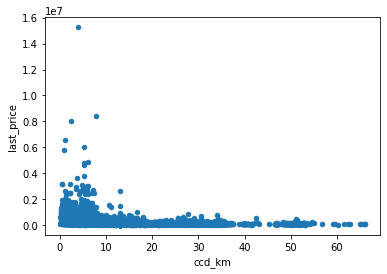

In [34]:
df.plot(kind='scatter', x='ccd_km', y='last_price')

#### Based on the graph, it looks like the significant shift occurs around 8 km, so we will consider anything within that range in the city center

#### In City Center:
- Examine correlations with total area, price, number of rooms, ceiling height

,total_area,last_price,bedrooms,ceiling_height
total_area,1.000000,0.636407,0.737234,0.129019
last_price,0.636407,1.000000,0.333342,0.070637
bedrooms,0.737234,0.333342,1.000000,0.101393
ceiling_height,0.129019,0.070637,0.101393,1.000000


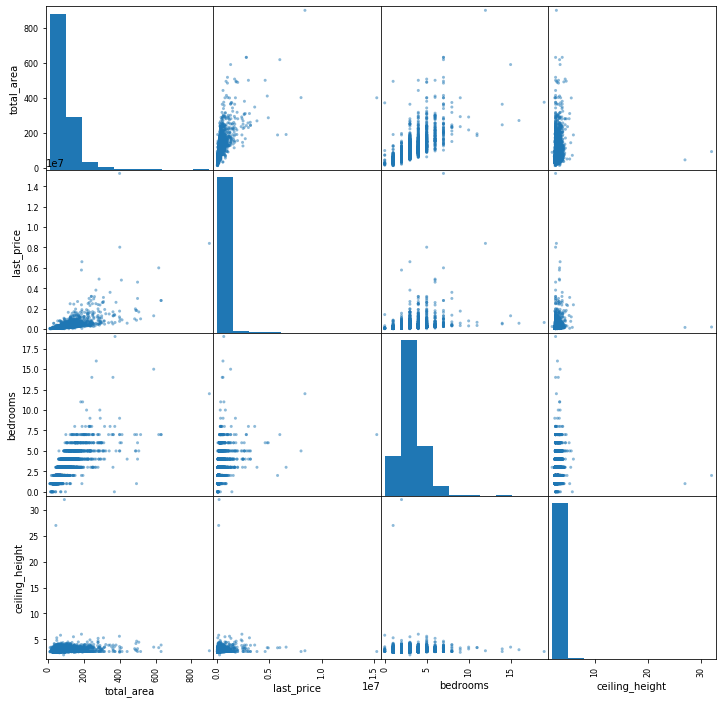

In [35]:
city_center = df.query('city_center_dist < 8000')
cc_vars = city_center[['total_area', 'last_price', 'bedrooms', 'ceiling_height']]

pd.plotting.scatter_matrix(cc_vars, figsize=(12, 12))
cc_vars.corr()

In [36]:
df['total_area'].corr(df['bedrooms'])

0.7587447699123252

#### How do the following affect price in City Center:
- number of rooms
- floor number
- distance to center
- publication date

In [37]:
l = ['bedrooms', 'floor', 'city_center_dist', 'weekday_posted', 'month_posted', 'year_posted']
for x in l:
    print('City Center {} correlation: {:.2f}%'.format(x, city_center['last_price'].corr(city_center[x])*100))
    print('  Full {} correlation: {:.2f}%'.format(x, df2['last_price'].corr(df2[x])*100))
    print('Difference: {:.2f}'.format((city_center['last_price'].corr(city_center[x])*100)-(df2['last_price'].corr(df2[x])*100)))
    print()

City Center bedrooms correlation: 33.33%
  Full bedrooms correlation: 35.28%
Difference: -1.94

City Center floor correlation: 12.57%
  Full floor correlation: 3.09%
Difference: 9.48

City Center city_center_dist correlation: -4.83%
  Full city_center_dist correlation: -18.12%
Difference: 13.29

City Center weekday_posted correlation: 2.34%
  Full weekday_posted correlation: 0.03%
Difference: 2.30

City Center month_posted correlation: -0.61%
  Full month_posted correlation: -0.03%
Difference: -0.58

City Center year_posted correlation: -4.32%
  Full year_posted correlation: -2.01%
Difference: -2.31



#### Conclusions on the City Center Apartments vs all the rest
- When specifically looking at city center apartments, most of these variables have stronger correlations compared to looking at all apartments inside and out of the city center
- The only exceptions are with the following variables:
    - Number of bedrooms: using all aparments, the impact on price is higher but not by much
    - City Center Distance: This makes sense, since being in the city center will have a lower impact on price. This also has the biggest difference in correlation

## Part 5) Conclusion

Overall, this data shows many factors of an apartment listed with Yandex.Realty. What I have found is that many of these factors have an impact on price, but most often not a very strong impact. The top contributors to price are total_area, bedrooms, and city_center_dist. Each of these are factors that make a listing more desirable. It is also important to note that total_area and bedrooms have a correlation of about 76%, meaning that they often rise and fall together. When you think about it, if an apartment has more bedrooms, then it is bigger, and if an aparment has a large area, then it probably has more bedrooms. The city_center_dist factor is also important, but less so, compared to price since it is again more desirable to live closer to the center of a city.